In [1106]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [1107]:
# import sys

# sys.path.append("../../")  # make imports from src easy
from src import Value

In [1351]:

def tanh(x):
    print("called")
    return (math.exp(2*x) - 1)/(math.exp(2*x) + 1)


In [1268]:
def matrix_mult_2D(n, m):
    if len(n[0]) != len(m):
        raise Exception("Wrong matrix dimensions")
    result = []
    for n_row_i, n_row in enumerate(n):
        result_row = []
        for m_col_i in range(len(m[0])):
            products = []
            m_col = [m_row[m_col_i] for m_row in m]
            for n_el, m_el in zip(n_row, m_col):
                products.append(n_el * m_el)
            result_row.append(sum(products))
        result.append(result_row)
    return result

In [1354]:
def functional_nn():
    X = [0.5]
    y_expected = [-0.5]

    # weights
    layers = [
        ([[-0.7], [0.2]], 2),  # weights on hidden layer
        ([[0.3, 0.4]], 1),  # wights on output layer
    ]

    activation_functions = [tanh, tanh]

    def forward_pass(X, layers, activation_functions):
        xs = [[x] for x in X]  # convert inputs to vector form
        for i, (layer, number_of_inputs) in enumerate(layers):
            act_func = activation_functions[i]
            # weights_matrix = [layer for _ in range(number_of_inputs)]

            xs = matrix_mult_2D(layer, xs)  # w*x
            xs = [
                [act_func(x[0])] for x in xs
            ]  # convert to vector form and apply activation function
            print(xs)
            print(layer)
        return [x[0] for x in xs]

    print(sum(forward_pass(X, layers, activation_functions)))


functional_nn()

called
called
[[-0.3363755443363322], [0.09966799462495583]]
[[-0.7], [0.2]]
called
[[-0.060969748677415884]]
[[0.3, 0.4]]
-0.060969748677415884


In [ ]:
[[-0.3363755443363322],
[0.09966799462495583]] * [[0.3, 0.4]]

In [1337]:

matrix_mult_2D([[-0.7], [0.2]],[[0.5]])

[[-0.35], [0.1]]

In [1335]:
np.matmul([[-0.7], [0.2]],[[0.5]] )

array([[-0.35],
       [ 0.1 ]])

In [1290]:
x = 0.5
y_expect= -0.5
w11 = -0.7
w12 = 0.2
w21 = 0.3
w22 = 0.4


In [1355]:
global t
t = 0


# forward
def forward(x):
    h11 = tanh(x * w11)  # first neuron first layer
    h12 = tanh(x * w12)  # second neuron first layer
    print(h11)
    print(h12)
    h21 = h11 * w21  # output neuron
    h22 = h12 * w22  # output neuron
    print(h21)
    print(h22)
    print(h21 + h22)
    global t
    t = tanh(h21 + h22)
    # f = h21 + h22
    return t


forward(x)

called
called
-0.3363755443363322
0.09966799462495583
-0.10091266330089967
0.039867197849982335
-0.06104546545091733
called


-0.060969748677415884

In [1356]:
print("w11:", w11, "w12:", w12, "w21:", w21, "w22:", w22)


global t
t = 0
# forward
# forward
def forward(x):
    h11 = tanh(x * w11)  # first neuron first layer
    h12 = tanh(x * w12)  # second neuron first layer
    print(h11)
    print(h12)
    h21 = h11 * w21  # output neuron
    h22 = h12 * w22  # output neuron
    print(h21)
    print(h22)
    print(h21 + h22)
    global t
    t = tanh(h21 + h22)
    # f = h21 + h22
    return t
f = forward(x)

print("f:", f)
loss = (f - y_expect)**2
loss_grad = 2*(f-y_expect)
print("loss:", loss)
# backward
f_grad = loss_grad
t_grad = (1 - t**2) + f_grad
h22_grad = 1.0 * t_grad
h21_grad = 1.0 * t_grad
w21_grad = (x * w11) * h21_grad
h11_grad = w21 * h21_grad
w22_grad = (x * w12) * h22_grad
h12_grad = w22 * h22_grad
w11_grad = x * h11_grad
w12_grad = x * h12_grad
print(
    "w11_grad: ",
    w11_grad,
    "w12_grad: ",
    w12_grad,
    " w21_grad: ",
    w21_grad,
    " w22_grad: ",
    w22_grad,
)

# update weights
cost = 0.01
w11 = w11 - cost * w11_grad
w12 = w12 - cost * w12_grad
w21 = w21 - cost * w21_grad
w22 = w22 - cost * w22_grad
print("w11:", w11, "w12:", w12, "w21:", w21, "w22:", w22)

w11: -0.7 w12: 0.2 w21: 0.3 w22: 0.4
called
called
-0.3363755443363322
0.09966799462495583
-0.10091266330089967
0.039867197849982335
-0.06104546545091733
called
f: -0.060969748677415884
loss: 0.19274756157637138
w11_grad:  0.2811514788587071 w12_grad:  0.37486863847827623  w21_grad:  -0.6560201173369833  w22_grad:  0.18743431923913811
w11: -0.702811514788587 w12: 0.19625131361521725 w21: 0.3065602011733698 w22: 0.39812565680760864


In [1111]:
xs = np.linspace(-10, 10, 400)  # 400 points from -10 to 10


In [1112]:
y_initial = [forward(xi) for xi in xs]

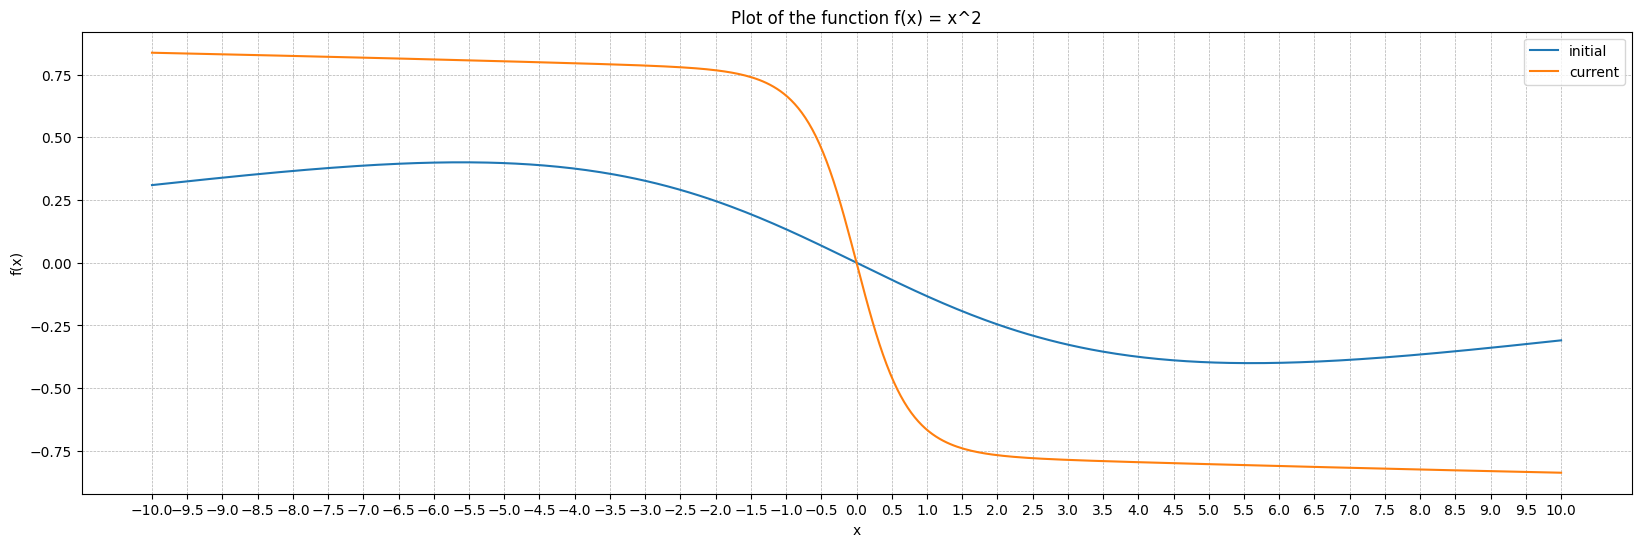

In [1223]:
plt.figure(figsize=(20, 6))  # Wider plot

# Step 4: Plot the function
plt.plot(xs,y_initial, label='initial')
plt.plot(xs, [forward(xi) for xi in xs], label='current')

# Optional: Add title and labels
plt.title('Plot of the function f(x) = x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

# Setting custom x-axis ticks with a step of 0.5
plt.xticks(np.arange(min(xs), max(xs)+0.5, 0.5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend()

# Step 5: Display the plot
plt.show()